Exponentially Weighted Moving Average

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Load the data
from uwv.config import CBS80072NED, CBS_OPENDATA_PROCESSED_DATA_DIR, OUTPUT_DIR

cbs = pd.read_parquet(CBS_OPENDATA_PROCESSED_DATA_DIR / f"{CBS80072NED}.parquet")

In [16]:
# Filter out rows where 'period_quarter_number' is 0
cbs = cbs[cbs['period_quarter_number'] != 0]

In [17]:
# Map quarters to months and create the 'date' column
cbs['month'] = cbs['period_quarter_number'].map({1: 1, 2: 4, 3: 7, 4: 10})
cbs['date'] = pd.to_datetime({'year': cbs['period_year'], 'month': cbs['month'], 'day': 1})

In [18]:
# Set this new 'date' column as the index
cbs.set_index('date', inplace=True)

In [19]:
# Filter data based on 'sbi_title'
sbi_code = 'T001081'  # Example: A-U Alle economische activiteiten
filtered_cbs = cbs[cbs['sbi'] == sbi_code]

In [20]:
# Filter the data to include only dates from 2016 to 2023
filtered_cbs = filtered_cbs.loc['2016-01-01':'2023-12-31']

In [22]:
# Calculate the 6-month and 12-month Simple Moving Averages (SMA)
filtered_cbs['6-month-SMA'] = filtered_cbs['sick_leave_percentage'].rolling(window=6).mean()
filtered_cbs['12-month-SMA'] = filtered_cbs['sick_leave_percentage'].rolling(window=12).mean()

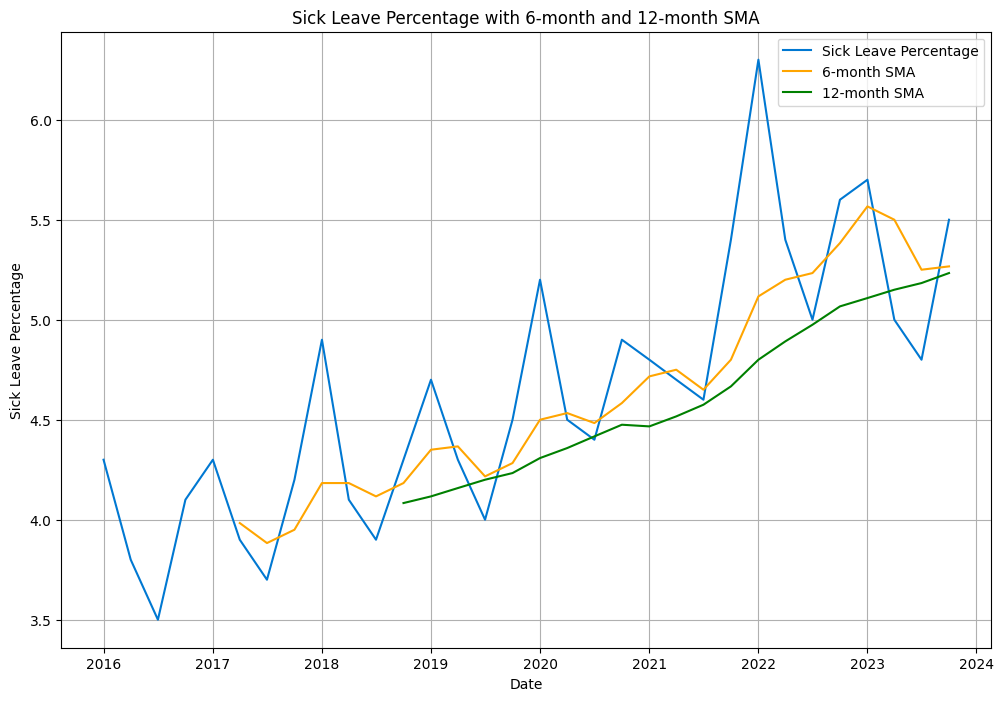

In [25]:
# Plot the original data and the moving averages
plt.figure(figsize=(12, 8))
plt.plot(filtered_cbs.index, filtered_cbs['sick_leave_percentage'], label='Sick Leave Percentage', color='#0078d2')
plt.plot(filtered_cbs.index, filtered_cbs['6-month-SMA'], label='6-month SMA', color='orange')
plt.plot(filtered_cbs.index, filtered_cbs['12-month-SMA'], label='12-month SMA', color='green')

plt.title('Sick Leave Percentage with 6-month and 12-month SMA')
plt.xlabel('Date')
plt.ylabel('Sick Leave Percentage')
plt.legend()
plt.grid(True)
plt.show()